<a href="https://colab.research.google.com/github/nedlecky/CSC485B/blob/main/CSC485_111_ThermocoupleDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 485B Spring 2023: CSC485_111_ThermocoupleDecisionTree for thermocouple!
## How does this stuff work?
* SUNY Plattsburgh, Spring 2023
* Dr. Ned Lecky
* nleck001@plattsburgh.edu
* ned@lecky.com

In [4]:
import numpy as np

# Pt-10% Rh Thermocouple data from Applied Numerical Methods, Carnahan, Luther, and Wilkes ISBN 471-13507-0
# EMF(mV) , Temperature(F)
x = np.array([0,300,500,1000,1500,1700,2000,2500,3000,3300,3500,4000,4500,5000,5300,5500,5900,6000], dtype='f')
y = np.array([32.0,122.4,176.0,296.4,405.7,447.6,509.0,608.4,704.7,761.4,799.0,891.9,983.0,1072.6,1125.7,1160.8,1230.3,1247.5])


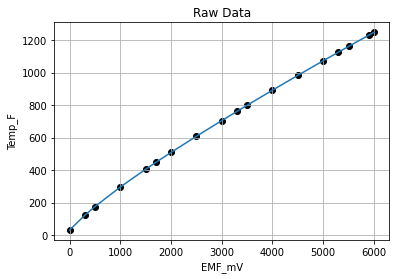

In [5]:
# Let's take a look at the sample data
import matplotlib.pyplot as plt

plt.scatter(x,y, color='black')
plt.plot(x,y)

plt.title('Raw Data')
plt.xlabel('EMF_mV')
plt.ylabel('Temp_F')
plt.grid()
plt.show()


In [6]:
# For n inputs and m outputs with N examples... (Note here n=m=1 and N=2)
# We need X to be an Nxn matrix and Y to be an Nxm matrix
n=1 # 1 input
m=1 # 1 output
N = x.shape[0]
X = x.reshape(N,n)
Y = y.reshape(N,m)
print(f"N={N} n={n} m={m}")


N=18 n=1 m=1


Mean squared error: 7105.48
Mean absolute error: 70.23
Mean absolute percentage error: 0.33
           deltaT_F
count  1.800000e+01
mean   4.105358e-14
std    8.673782e+01
min   -1.397000e+02
25%   -7.627500e+01
50%    6.000000e-01
75%    5.930625e+01
max    1.536500e+02


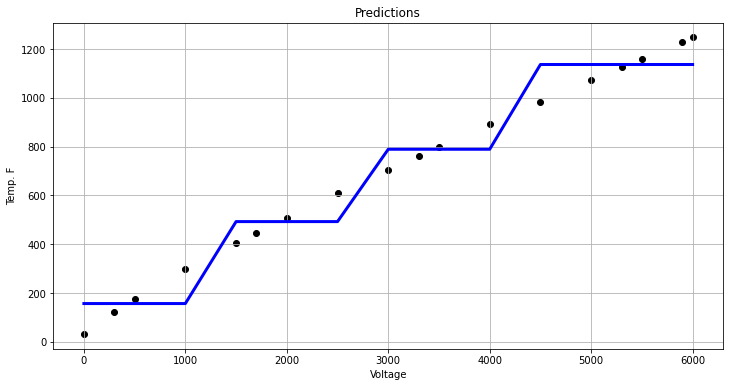

In [7]:
# Decision Tree regression fit...
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

def try_decision_tree(X_in, try_max_depth=2, title="Predictions"):
  # Just take these out and drop in Decision Tree!
  #regr = linear_model.LinearRegression()
  #regr.fit(X_in, Y)
  global regr
  regr = DecisionTreeRegressor(max_depth=try_max_depth)
  regr.fit(X, Y)

  # Add the reshape since decision tree outputs 18,1 otherwise
  Y_pred = regr.predict(X_in).reshape(N,1)
  print(f"Mean squared error: {mean_squared_error(Y, Y_pred):.2f}")
  print(f"Mean absolute error: {mean_absolute_error(Y, Y_pred):.2f}")
  print(f"Mean absolute percentage error: {mean_absolute_percentage_error(Y, Y_pred):.2f}")

  # Put error in pandas so we can use .describe()
  e = pd.DataFrame(Y_pred-Y, columns=['deltaT_F'])
  print(e.describe())
  # Probably not very good performance!

  # Plot original and predicted
  plt.figure(figsize=(12,6))
  plt.scatter(X, Y, color="black")
  plt.plot(X, Y_pred, color="blue", linewidth=3)
  plt.title(title)
  plt.xlabel('EMF_mV')
  plt.ylabel('Temp_F')
  plt.grid()
  plt.show()

try_decision_tree(X)


# It's doing something, but WHAT?


|--- feature_0 <= 2750.00
|   |--- feature_0 <= 1250.00
|   |   |--- value: [156.70]
|   |--- feature_0 >  1250.00
|   |   |--- value: [492.68]
|--- feature_0 >  2750.00
|   |--- feature_0 <= 4250.00
|   |   |--- value: [789.25]
|   |--- feature_0 >  4250.00
|   |   |--- value: [1136.65]



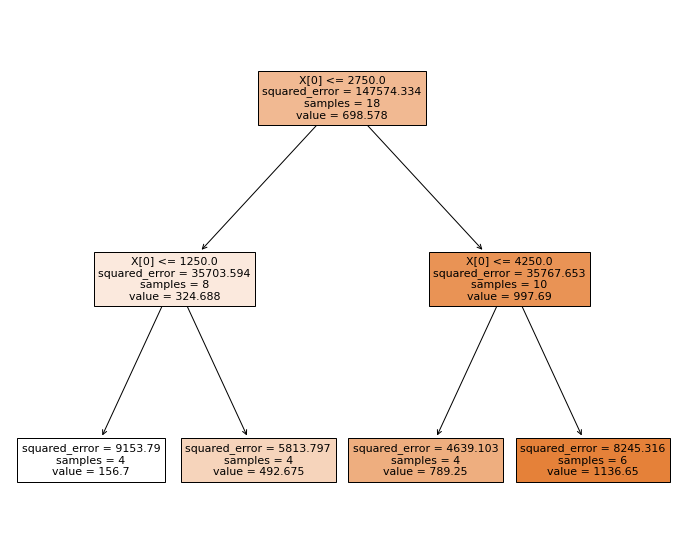

In [8]:
from sklearn import tree

text_representation = tree.export_text(regr)
print(text_representation)

fig = plt.figure(figsize=(12,10))
_ = tree.plot_tree(regr, filled=True)

Mean squared error: 1912.58
Mean absolute error: 35.98
Mean absolute percentage error: 0.20
           deltaT_F
count  1.800000e+01
mean  -1.578984e-15
std    4.500098e+01
min   -6.586667e+01
25%   -4.278125e+01
50%    0.000000e+00
75%    4.116875e+01
max    7.813333e+01


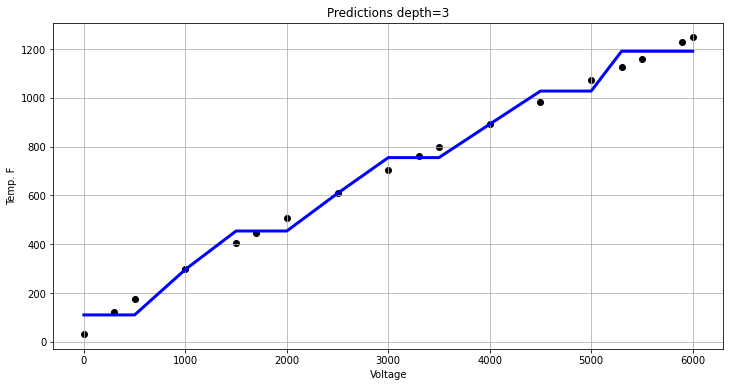

Mean squared error: 210.28
Mean absolute error: 10.30
Mean absolute percentage error: 0.03
           deltaT_F
count  1.800000e+01
mean   1.421085e-14
std    1.492154e+01
min   -2.680000e+01
25%   -6.450000e+00
50%    0.000000e+00
75%    6.450000e+00
max    2.680000e+01


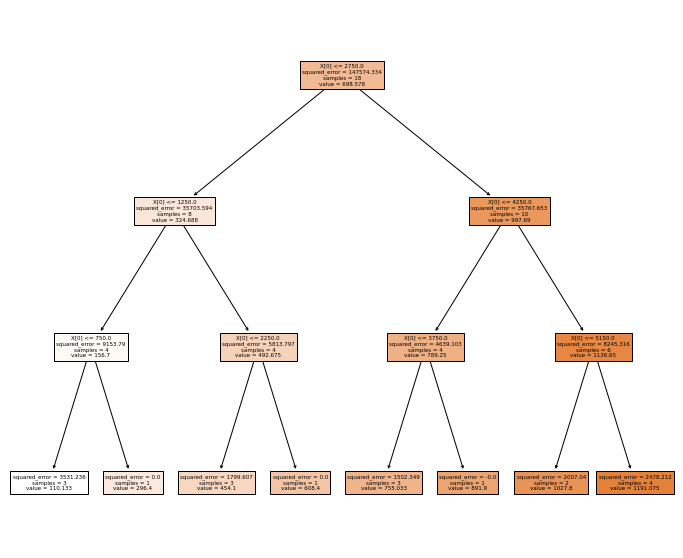

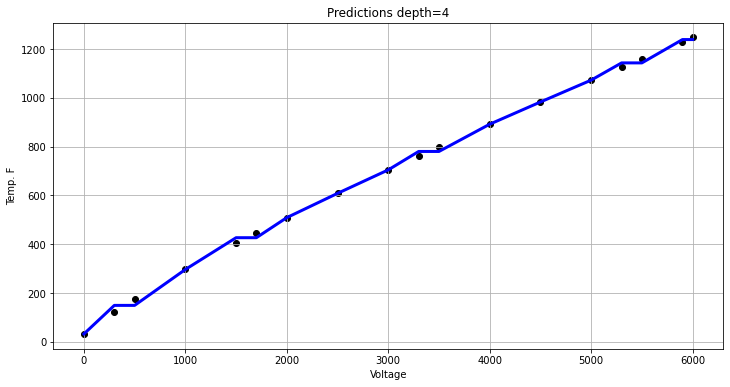

Mean squared error: 0.00
Mean absolute error: 0.00
Mean absolute percentage error: 0.00
       deltaT_F
count      18.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0


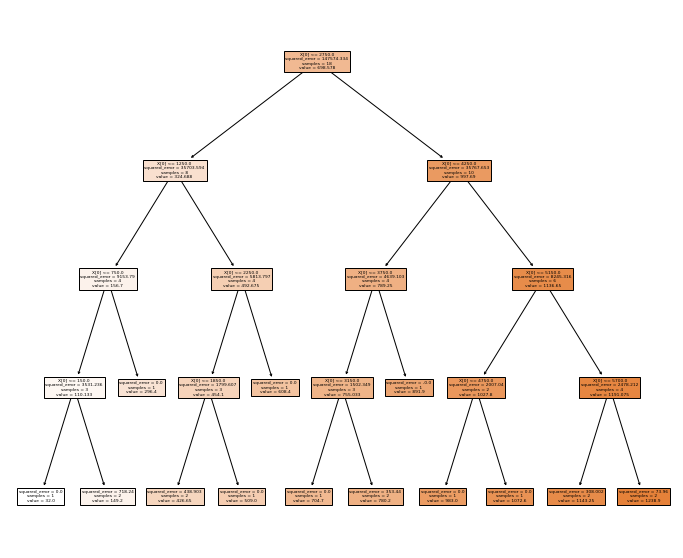

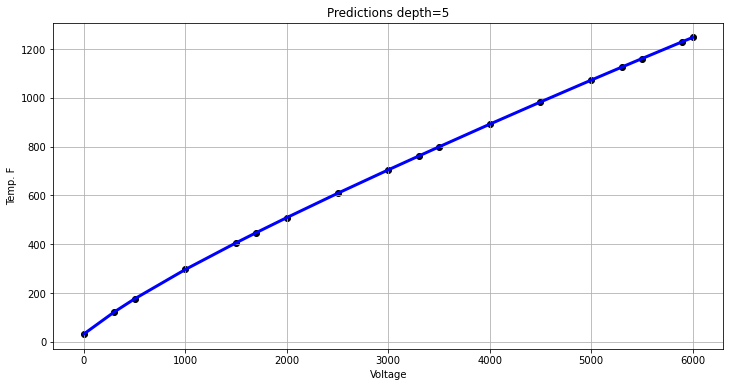

Mean squared error: 0.00
Mean absolute error: 0.00
Mean absolute percentage error: 0.00
       deltaT_F
count      18.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0


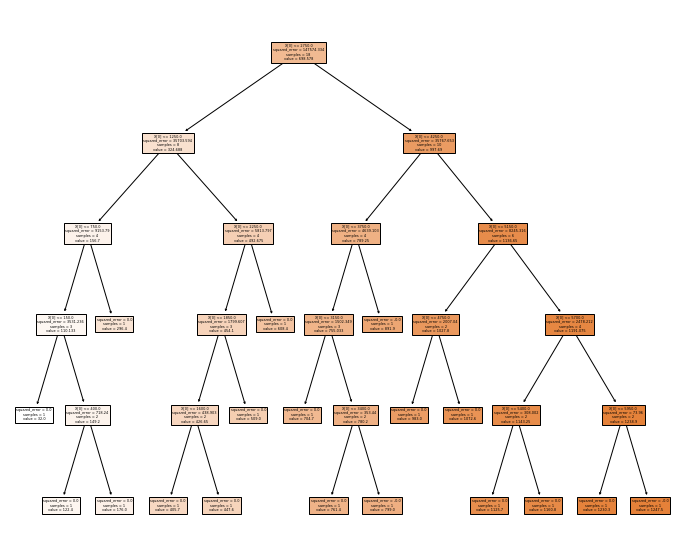

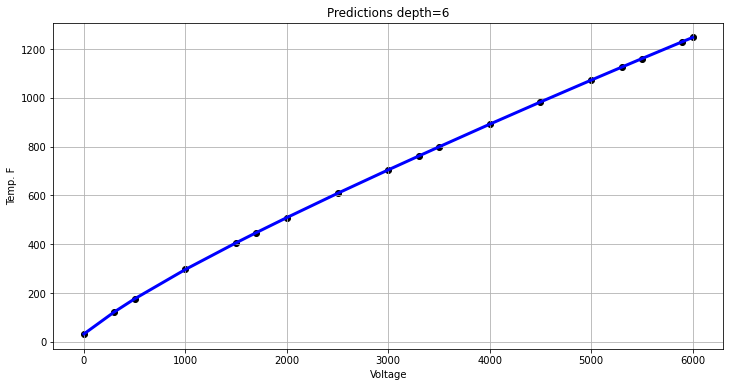

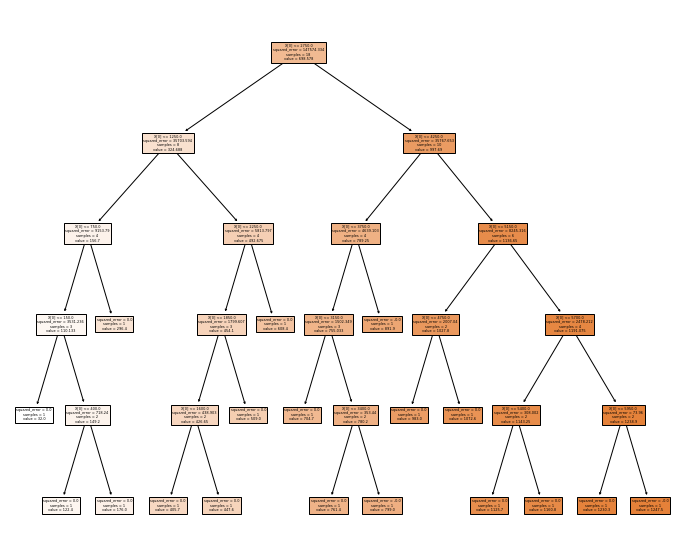

In [9]:
# seems like more max_depth might help??

for depth in range(3,7):
  try_decision_tree(X,depth,f'Predictions depth={depth}')
  fig = plt.figure(figsize=(12,10))
  _ = tree.plot_tree(regr, filled=True)


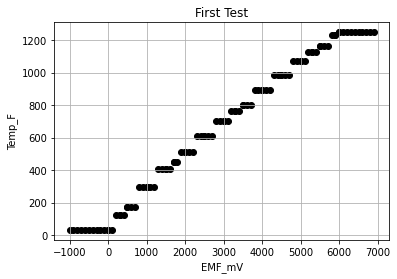

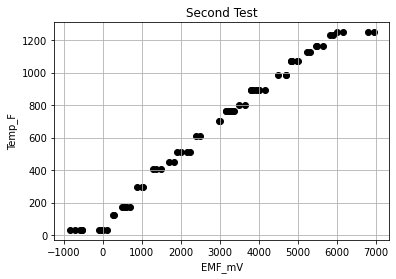

In [11]:
# Looks terrific, right?

# But what is it going to do on full-range data??
def test_inputs(X_test, title='Test Data'):
  Y_pred = regr.predict(X_test)

  # Plot original and predicted
  plt.scatter(X, Y, color="black")
  plt.scatter(X_test, Y_pred, color="black")
  #plt.plot(X_test, Y_pred, color="blue", linewidth=3)
  plt.title(title)
  plt.xlabel('EMF_mV')
  plt.ylabel('Temp_F')
  plt.grid()
  plt.show()

# Regular test data
X_test = np.arange(-1000,7000,100)
test_inputs(X_test.reshape(-1,1), 'First Test')

# Some random test data
X_test = np.random.rand(50)*8000-1000
test_inputs(X_test.reshape(-1,1), 'Second Test')

